In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
reviews = pd.read_csv('../data/reviews_arhip.csv', names=['text', 'label'], encoding='utf-8')

In [3]:
reviews.head()

,text,label
0,Купила пуховик в вашем магазине очень нравитс...,1.0
1,Заказывала в магазине BrainMart сумку для ноут...,1.0
2,"Отличный магазин, хорошие часы. Все понравилос...",1.0
3,Заказ 262717. Два раза покупал телефоны с аксе...,1.0
4,Заказ в этом магазине был выполнен на хорошем...,1.0


In [4]:
reviews.shape

(98134, 2)

In [5]:
for row in reviews.text[:5]:
    print row

Купила пуховик в вашем магазине  очень нравится ,ношу с удовольствием, теплый, легкий ,модный . покупкой довольна .
Заказывала в магазине BrainMart сумку для ноутбука. Очень понравилась на картинке - выглядит очень стильно и оригинально, на вид достаточно лёгкая и удобная. Заказ оформила прямо на сайте с доставкой на следующий день. Товар качественный, соответствует изображению. Уже месяц хожу с этой сумкой, очень довольна.
Отличный магазин, хорошие часы. Все понравилось, кроме сроков доставки. Заказывал Fossil JR1510
Заказ 262717. Два раза покупал телефоны с аксессуарами. Отличные аппараты, богатый ассортимент чехлов, аккуратно наклеили стекло. Доставили вовремя. Курьеры вежливые и пунктуальные. Собираюсь покупать здесь еще один телефон. Очень рекомендую магазин!
Заказ в этом магазине был выполнен  на хорошем уровне.Заказал через сайт дизельный генератор  CTG AD-18RES-M.на заказ ответили быстро и четко дали консультацию по заказанному товару.Доставка была сделана в оговоренный срок ге

In [6]:
reviews = reviews[~reviews.text.duplicated()]
reviews.shape

(96350, 2)

In [7]:
print reviews.shape
reviews.dropna(inplace=True)
print reviews.shape

(96350, 2)
(96350, 2)


In [12]:
def binarize_label(label):
    if label > 0.5:
        return 1
    else:
        return -1
    
reviews = reviews[reviews.label != 0.5]
reviews.loc[:, 'label'] = reviews.label.apply(binarize_label)

Соотношение классов:

In [13]:
reviews.label.value_counts()

 1    73904
-1    21311
Name: label, dtype: int64

Распределение длин сообщений (в символах)

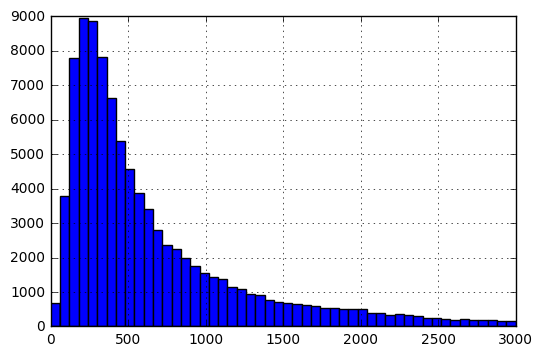

In [38]:
reviews[reviews.text.apply(len) < 3000].text.apply(len).hist(bins=50)

Ограничимся сообщениями длины < 1000

In [39]:
reviews = reviews[reviews.text.apply(len) < 1000]

Распределение длин сообщений (~в словах)

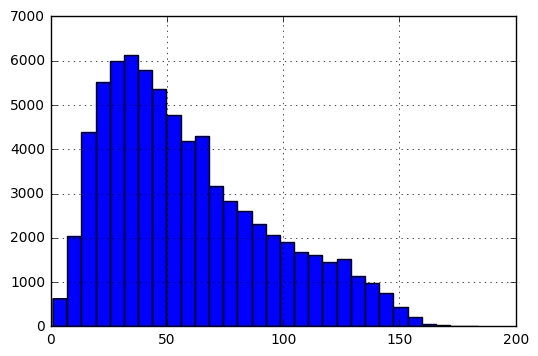

In [41]:
reviews.text.apply(lambda s: len(s.split())).hist(bins=30)

In [42]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(reviews.text, reviews.label,
                                                    test_size=TEST_SIZE, random_state=42)

In [43]:
reviews_train = pd.DataFrame(X_train)
reviews_train['label'] = y_train

reviews_test = pd.DataFrame(X_test)
reviews_test['label'] = y_test

In [44]:
reviews_train.to_csv('../data/reviews_train.csv', index=False, encoding='utf-8')
reviews_test.to_csv('../data/reviews_test.csv', index=False, encoding='utf-8')

---